<a href="https://colab.research.google.com/github/cesaroliveiragoes/Statistics-for-Data-Science/blob/main/Checkpoint_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Checkpoint 1

## Carregar módulos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Carregar dados

In [2]:
path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
path_dead =  'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

In [3]:
dados_paises_covid = pd.read_csv(path)
dados_paises_covid_dead = pd.read_csv(path_dead)

In [4]:
dados_paises_covid

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135


## Ajustes



- Nomes das colunas

In [5]:
dados_paises_covid.rename(columns={"Province/State": "province", 
                                   "Country/Region": "country"}, 
                          inplace=True)

In [6]:
dados_paises_covid_dead.rename(columns={"Province/State": "province", 
                                        "Country/Region": "country"}, 
                               inplace=True)

In [7]:
dados_paises_covid_dead.columns

Index(['province', 'country', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20',
       '1/25/20', '1/26/20', '1/27/20',
       ...
       '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
       '3/7/23', '3/8/23', '3/9/23'],
      dtype='object', length=1147)

- Reajustar dados

In [8]:
dados_paises_covid = dados_paises_covid.melt(id_vars=['province', 'country', 'Lat', 'Long'], 
                                             var_name = 'date', 
                                             value_name = 'infected')

In [9]:
dados_paises_covid_dead = dados_paises_covid_dead.melt(id_vars=['province', 'country', 'Lat', 'Long'], 
                                                       var_name = 'date', 
                                                       value_name = 'dead')

In [10]:
dados_paises_covid_dead.tail()

,province,country,Lat,Long,date,dead
330322,NaN,West Bank and Gaza,31.952200,35.233200,3/9/23,5708
330323,NaN,Winter Olympics 2022,39.904200,116.407400,3/9/23,0
330324,NaN,Yemen,15.552727,48.516388,3/9/23,2159
330325,NaN,Zambia,-13.133897,27.849332,3/9/23,4057
330326,NaN,Zimbabwe,-19.015438,29.154857,3/9/23,5671


In [11]:
dados_paises_covid_dead.dtypes

province     object
country      object
Lat         float64
Long        float64
date         object
dead          int64
dtype: object

- Ajustar datas

In [12]:
dados_paises_covid['date'] = pd.to_datetime(dados_paises_covid['date'], 
                                            infer_datetime_format='True')

In [13]:
dados_paises_covid_dead['date'] = pd.to_datetime(dados_paises_covid_dead['date'], 
                                                 infer_datetime_format='True')

In [14]:
dados_paises_covid.tail()

,province,country,Lat,Long,date,infected
330322,NaN,West Bank and Gaza,31.952200,35.233200,2023-03-09,703228
330323,NaN,Winter Olympics 2022,39.904200,116.407400,2023-03-09,535
330324,NaN,Yemen,15.552727,48.516388,2023-03-09,11945
330325,NaN,Zambia,-13.133897,27.849332,2023-03-09,343135
330326,NaN,Zimbabwe,-19.015438,29.154857,2023-03-09,264276


In [15]:
dados_paises_covid_dead.tail()

,province,country,Lat,Long,date,dead
330322,NaN,West Bank and Gaza,31.952200,35.233200,2023-03-09,5708
330323,NaN,Winter Olympics 2022,39.904200,116.407400,2023-03-09,0
330324,NaN,Yemen,15.552727,48.516388,2023-03-09,2159
330325,NaN,Zambia,-13.133897,27.849332,2023-03-09,4057
330326,NaN,Zimbabwe,-19.015438,29.154857,2023-03-09,5671


In [16]:
dados_paises_covid_dead.dtypes

province            object
country             object
Lat                float64
Long               float64
date        datetime64[ns]
dead                 int64
dtype: object

- Combinar os datasets

In [17]:
dados_paises_covid.shape

(330327, 6)

In [18]:
dados_paises_covid_dead.shape

(330327, 6)

In [19]:
dados_covid = pd.merge(dados_paises_covid, dados_paises_covid_dead, 
                       on = ['province', 'country',	'Lat',	'Long',	'date'], 
                       how = 'inner')

In [20]:
dados_covid.head()

,province,country,Lat,Long,date,infected,dead
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0


In [21]:
dados_covid.shape

(330327, 7)

## Aqui começa o trabalho

1 – Quantos países existem no banco de dados?

In [22]:
dados_covid.columns

Index(['province', 'country', 'Lat', 'Long', 'date', 'infected', 'dead'], dtype='object')

In [23]:
dados_covid['country'].unique()


array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Gua

In [24]:
len(dados_covid['country'].unique())-6

195

2 – Quantos casos de infectados e mortes Brasil, Itália e E.U.A. possuem até o momento?

In [25]:
dados_covid.columns

Index(['province', 'country', 'Lat', 'Long', 'date', 'infected', 'dead'], dtype='object')

In [26]:
lista_paises = ['Brazil', 'US', 'Italy']
dados_covid[dados_covid['country'].isin(lista_paises)].tail(3)

,province,country,Lat,Long,date,infected,dead
330069,NaN,Brazil,-14.23500,-51.92530,2023-03-09,37076053,699276
330192,NaN,Italy,41.87194,12.56738,2023-03-09,25603510,188322
330298,NaN,US,40.00000,-100.00000,2023-03-09,103802702,1123836


3 – Quais os 10 países que possuem os maiores valores de infectados? E quais os 10 de maiores mortes?

Forma A

In [27]:
dados_covid.columns

Index(['province', 'country', 'Lat', 'Long', 'date', 'infected', 'dead'], dtype='object')

In [28]:
dados_infectados = dados_covid.sort_values('infected', ascending = False)

In [29]:
data = pd.Timestamp('2023-03-09')

In [30]:
dados_infectados[dados_infectados['date'] == data].head(10)

,province,country,Lat,Long,date,infected,dead
330298,NaN,US,40.000000,-100.000000,2023-03-09,103802702,1123836
330186,NaN,India,20.593684,78.962880,2023-03-09,44690738,530779
330169,NaN,France,46.227600,2.213700,2023-03-09,38618509,161512
330173,NaN,Germany,51.165691,10.451526,2023-03-09,38249060,168935
330069,NaN,Brazil,-14.235000,-51.925300,2023-03-09,37076053,699276
330194,NaN,Japan,36.204824,138.252924,2023-03-09,33320438,72997
330200,NaN,"Korea, South",35.907757,127.766922,2023-03-09,30615522,34093
330192,NaN,Italy,41.871940,12.567380,2023-03-09,25603510,188322
330316,NaN,United Kingdom,55.378100,-3.436000,2023-03-09,24425309,219948
330259,NaN,Russia,61.524010,105.318756,2023-03-09,22075858,388478


In [31]:
dados_mortos = dados_covid.sort_values('dead', ascending = False)

In [32]:
dados_mortos[dados_mortos['date'] == data].head(10)

,province,country,Lat,Long,date,infected,dead
330298,NaN,US,40.000000,-100.000000,2023-03-09,103802702,1123836
330069,NaN,Brazil,-14.235000,-51.925300,2023-03-09,37076053,699276
330186,NaN,India,20.593684,78.962880,2023-03-09,44690738,530779
330259,NaN,Russia,61.524010,105.318756,2023-03-09,22075858,388478
330223,NaN,Mexico,23.634500,-102.552800,2023-03-09,7483444,333188
330316,NaN,United Kingdom,55.378100,-3.436000,2023-03-09,24425309,219948
330253,NaN,Peru,-9.190000,-75.015200,2023-03-09,4487553,219539
330192,NaN,Italy,41.871940,12.567380,2023-03-09,25603510,188322
330173,NaN,Germany,51.165691,10.451526,2023-03-09,38249060,168935
330169,NaN,France,46.227600,2.213700,2023-03-09,38618509,161512


Forma B

In [33]:
df_covid_max_date = dados_covid[dados_covid.groupby('country').date.transform('max') == dados_covid['date']]

In [34]:
df_covid_max_date[['country', 'date', 'infected']].sort_values('infected', ascending = False).head(10)

,country,date,infected
330298,US,2023-03-09,103802702
330186,India,2023-03-09,44690738
330169,France,2023-03-09,38618509
330173,Germany,2023-03-09,38249060
330069,Brazil,2023-03-09,37076053
330194,Japan,2023-03-09,33320438
330200,"Korea, South",2023-03-09,30615522
330192,Italy,2023-03-09,25603510
330316,United Kingdom,2023-03-09,24425309
330259,Russia,2023-03-09,22075858


In [35]:
df_covid_max_date[['country', 'date', 'dead']].sort_values('dead', ascending = False).head(10)

,country,date,dead
330298,US,2023-03-09,1123836
330069,Brazil,2023-03-09,699276
330186,India,2023-03-09,530779
330259,Russia,2023-03-09,388478
330223,Mexico,2023-03-09,333188
330316,United Kingdom,2023-03-09,219948
330253,Peru,2023-03-09,219539
330192,Italy,2023-03-09,188322
330173,Germany,2023-03-09,168935
330169,France,2023-03-09,161512


4 – Criar uma coluna denominada taxa de mortalidade (mortos/infectados). Quais os 10 países que possuem maiores valores desta taxa? Você acredita que a taxa de mortalidade uma boa métrica? Quais vieses você conseguiu perceber?

In [36]:
dados_covid['Taxa_de_Mortalidade'] = dados_covid['dead'] / dados_covid['infected']


In [37]:
tx_mortalidade = dados_covid.sort_values('Taxa_de_Mortalidade', ascending = False)


In [38]:
tx_mortalidade[tx_mortalidade['date'] == data].head(10)

,province,country,Lat,Long,date,infected,dead,Taxa_de_Mortalidade
330080,Diamond Princess,Canada,0.000000,0.000000,2023-03-09,0,1,inf
330199,NaN,"Korea, North",40.339900,127.510100,2023-03-09,1,6,6.000000
330213,NaN,MS Zaandam,0.000000,0.000000,2023-03-09,9,2,0.222222
330324,NaN,Yemen,15.552727,48.516388,2023-03-09,11945,2159,0.180745
330281,NaN,Sudan,12.862800,30.217600,2023-03-09,63829,5017,0.078601
330110,Hubei,China,30.975600,112.270700,2023-03-09,72131,4515,0.062594
330286,NaN,Syria,34.802075,38.996815,2023-03-09,57467,3164,0.055058
330127,Unknown,China,NaN,NaN,2023-03-09,1521816,82195,0.054011
330276,NaN,Somalia,5.152149,46.199616,2023-03-09,27324,1361,0.049810
330253,NaN,Peru,-9.190000,-75.015200,2023-03-09,4487553,219539,0.048922


Resposta: 

Nós acreditamos que a taxa de mortalidade não seja uma boa métrica neste caso, uma vez que a amostragem considerada é apenas a do dia 09/03/2023, ou seja, se uma pessoa morrer (dead) e nenhuma infectada(infected) a taxa de mortalidade será alta, porém, isso não condiz com a realidade de uma forma mais ampla. 

Acreditamos que a taxa de mortalidade deverá ser medida baseada no total desde o início da coleta dos dados ou até mesmo em uma amostragem com um período de maior de tempo, e considerando mais fatores como densidade populacional.

Além disso, os páises estão apresentando os dados elevados de mortos e infectados para apenas um dia, como o caso do Peru e não há informações detalhadas do período, se é do dia 09/03 ou de um período maior de tempo.

5 – Gere os seguintes gráficos:

a) Gráfico de linhas contendo a evolução do número de infectados do Brasil e Estados Unidos.

In [39]:
import matplotlib.pyplot as plt


In [40]:
dados_covid.columns

Index(['province', 'country', 'Lat', 'Long', 'date', 'infected', 'dead',
       'Taxa_de_Mortalidade'],
      dtype='object')

In [41]:
dados_br = dados_covid[dados_covid['country'] == 'Brazil']
dados_us = dados_covid[dados_covid['country'] == 'US']

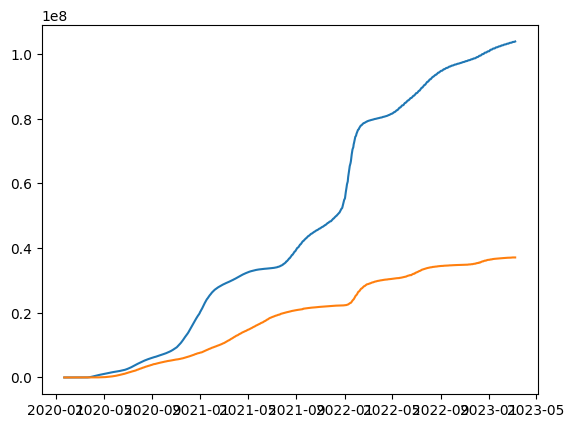

In [42]:
plt.plot(dados_us['date'], dados_us['infected'])
plt.plot(dados_br['date'], dados_br['infected'])

b) Gráfico de linhas contendo a evolução do número de mortos do Brasil e Estados Unidos.

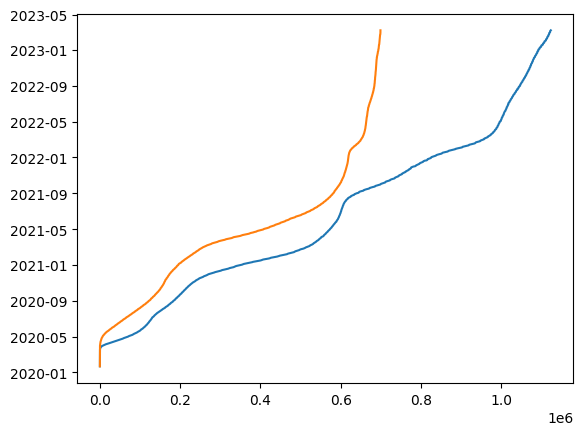

In [43]:
plt.plot(dados_us['dead'], dados_us['date'])
plt.plot(dados_br['dead'], dados_br['date'])

c) Gráfico de barras comparando o número de infectados de Brasil e Estados Unidos em 20/mar.

In [44]:
dados_br = dados_covid[(dados_covid['country'] == 'Brazil') & (dados_covid['date'] == '2023-03-09')] 
dados_us = dados_covid[(dados_covid['country'] == 'US') & (dados_covid['date'] == '2023-03-09')]


<BarContainer object of 1 artists>

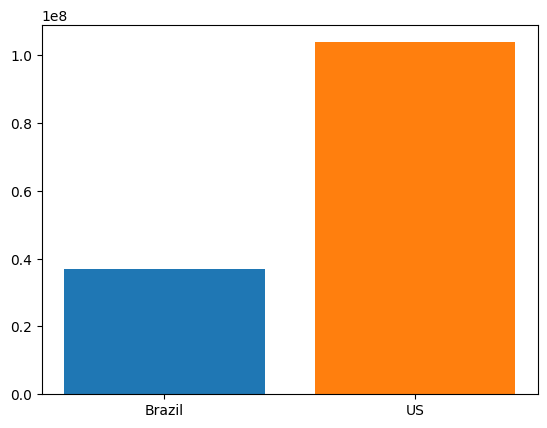

In [45]:
plt.bar(dados_br['country'], dados_br['infected'])
plt.bar(dados_us['country'], dados_us['infected'])

d) Gráfico de barras comparando o número de mortos de Brasil e Estados Unidos em 20/mar.

<BarContainer object of 1 artists>

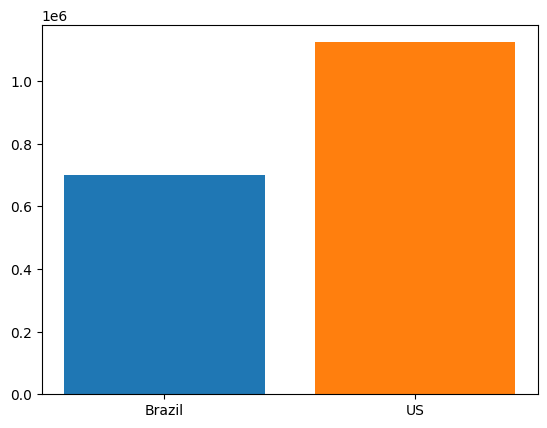

In [46]:
plt.bar(dados_br['country'], dados_br['dead'])
plt.bar(dados_us['country'], dados_us['dead'])

e) Gráfico de barras comparando a taxa de mortalidade de Brasil e Estados Unidos em 20/mar.

<BarContainer object of 1 artists>

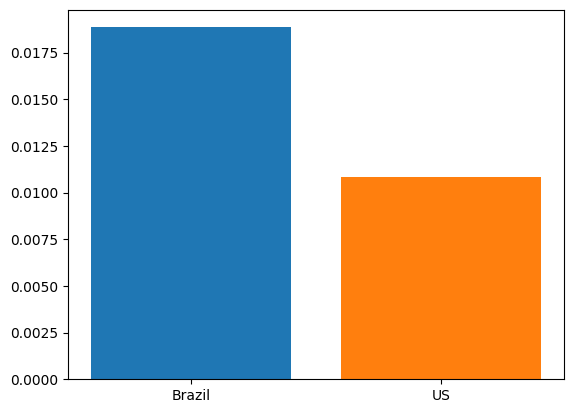

In [47]:
plt.bar(dados_br['country'], dados_br['Taxa_de_Mortalidade'])
plt.bar(dados_us['country'], dados_us['Taxa_de_Mortalidade'])